Load required libraries

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# DATA INPUT

Upload data from directory

In [2]:
uploaded = files.upload()
df = pd.read_csv('DLBCLgenes.csv')


Saving DLBCLgenes.csv to DLBCLgenes.csv


In [3]:
uploaded = files.upload()
cl = pd.read_csv('DLBCLtarget.csv')

Saving DLBCLtarget.csv to DLBCLtarget.csv


Processing of data

In [4]:
#0=UNC, 1=MHG, 2=GCB, 3=ABC
cl = cl.replace({'MHG': 1, 'UNC': 0,'GCB':2, 'ABC':3})
#cl.index = range(1, len(cl) + 1)

In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
counts = cl['label'].value_counts()
print(counts)

2    517
3    345
0    278
1    170
Name: label, dtype: int64


In [7]:
df

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,13.2665,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,12.7826,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,13.8579,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,14.8694,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,14.8504,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,13.3141,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203
1306,7.5194,7.9761,15.0987,12.7311,10.7386,10.5480,10.2639,13.2170,9.0634,12.0775,14.8201,7.9825,15.0999,11.9393,12.3584,15.4841,8.3209,10.1631,8.6265,12.2641
1307,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,14.6072,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371
1308,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,14.2247,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853


#Principal Component Analysis (PCA)

Principal Component Analysis FOR ALL THE DATA

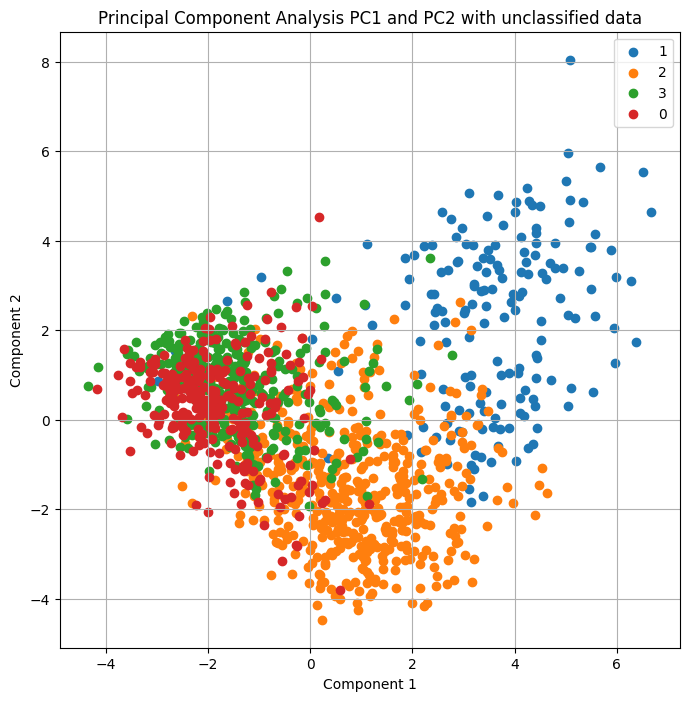

In [8]:
features = df.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform PCA
pca = PCA()
pca.fit(df_scaled)
principal_components = pca.transform(df_scaled)

pc_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)])
pc_df['Class'] = cl
class_labels = pc_df['Class'].unique()

# Create a scatter plot
plt.figure(figsize=(8, 8))
for label in class_labels:
    subset = pc_df[pc_df['Class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis PC1 and PC2 with unclassified data')
plt.legend()
plt.grid(True)
plt.show()


#SEPARATE UNC=278

In [9]:
data = df.join(cl)
# Print the concatenated DataFrame
data

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,...,15413,115,14684,15510,8671,4098,12917,4275,27869,label
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,...,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535,1
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,...,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840,1
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,...,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319,1
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,...,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701,2
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,...,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,...,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203,1
1306,7.5194,7.9761,15.0987,12.7311,10.7386,10.5480,10.2639,13.2170,9.0634,12.0775,...,7.9825,15.0999,11.9393,12.3584,15.4841,8.3209,10.1631,8.6265,12.2641,0
1307,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,...,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371,2
1308,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,...,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853,2


### work on unc test set

In [10]:
unc = data[data['label'] == 0].copy()

data.drop(data[data['label'] == 0].index, inplace=True)

data.reset_index(drop=True, inplace=True)


In [11]:
unc = unc.drop('label', axis=1)
unc

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
18,7.8612,10.7530,15.3691,11.7745,11.7912,13.8865,7.4960,13.3377,10.8423,11.1436,14.5150,9.4001,13.4642,11.4557,11.4306,14.8156,8.1377,13.2538,11.7538,10.4637
24,7.5410,11.2758,14.4737,11.1772,12.6420,9.5356,7.7755,12.9813,8.5763,8.7607,15.1654,7.6660,11.3115,10.8337,11.1626,12.6483,8.4251,11.7588,7.8886,12.0222
29,7.6100,8.3476,15.1745,12.1466,11.1848,11.8832,9.3867,13.3950,7.4339,8.6359,14.9262,8.8874,8.4182,11.6242,9.8899,12.8692,10.7816,11.3775,7.9099,8.7019
36,10.6964,8.6118,14.9840,11.6308,11.1586,9.5184,7.6186,13.9252,7.5299,8.3849,14.8770,9.2324,13.3144,7.8454,11.3109,14.2598,10.7226,12.5811,7.8435,9.6484
48,9.2205,9.7125,14.8608,12.4415,11.9220,7.6731,7.7189,13.2048,7.5950,8.1257,15.0053,8.3233,9.3690,10.1204,12.3121,12.1488,8.4108,12.2465,8.0565,10.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,9.8065,8.0016,13.6923,11.3359,11.7510,7.9980,9.2938,13.3436,9.8317,8.2266,14.9062,7.8619,13.1139,10.2106,13.1681,13.3574,8.1785,10.7058,7.9234,8.6144
1255,9.4556,8.5178,14.7912,13.1864,12.1985,7.8608,8.9514,13.7707,8.9895,8.4956,14.9651,7.7865,12.4085,9.7674,12.9425,10.5121,8.0011,10.9896,7.7726,10.4220
1262,11.9591,8.0095,14.1165,13.5478,11.5453,7.6854,7.4382,13.6044,12.9590,7.8967,13.3442,8.1817,14.1487,10.3525,12.8377,11.1903,9.2136,9.5692,9.0011,9.8996
1289,12.0908,7.8768,14.5337,13.6799,12.3166,7.5389,9.6418,13.7782,13.1233,9.2721,14.7078,7.5486,12.1092,9.9122,13.7548,11.7498,8.3507,11.4182,8.0996,10.1140


In [12]:
unc = unc.reset_index(drop=True)
unc

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8612,10.7530,15.3691,11.7745,11.7912,13.8865,7.4960,13.3377,10.8423,11.1436,14.5150,9.4001,13.4642,11.4557,11.4306,14.8156,8.1377,13.2538,11.7538,10.4637
1,7.5410,11.2758,14.4737,11.1772,12.6420,9.5356,7.7755,12.9813,8.5763,8.7607,15.1654,7.6660,11.3115,10.8337,11.1626,12.6483,8.4251,11.7588,7.8886,12.0222
2,7.6100,8.3476,15.1745,12.1466,11.1848,11.8832,9.3867,13.3950,7.4339,8.6359,14.9262,8.8874,8.4182,11.6242,9.8899,12.8692,10.7816,11.3775,7.9099,8.7019
3,10.6964,8.6118,14.9840,11.6308,11.1586,9.5184,7.6186,13.9252,7.5299,8.3849,14.8770,9.2324,13.3144,7.8454,11.3109,14.2598,10.7226,12.5811,7.8435,9.6484
4,9.2205,9.7125,14.8608,12.4415,11.9220,7.6731,7.7189,13.2048,7.5950,8.1257,15.0053,8.3233,9.3690,10.1204,12.3121,12.1488,8.4108,12.2465,8.0565,10.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,9.8065,8.0016,13.6923,11.3359,11.7510,7.9980,9.2938,13.3436,9.8317,8.2266,14.9062,7.8619,13.1139,10.2106,13.1681,13.3574,8.1785,10.7058,7.9234,8.6144
274,9.4556,8.5178,14.7912,13.1864,12.1985,7.8608,8.9514,13.7707,8.9895,8.4956,14.9651,7.7865,12.4085,9.7674,12.9425,10.5121,8.0011,10.9896,7.7726,10.4220
275,11.9591,8.0095,14.1165,13.5478,11.5453,7.6854,7.4382,13.6044,12.9590,7.8967,13.3442,8.1817,14.1487,10.3525,12.8377,11.1903,9.2136,9.5692,9.0011,9.8996
276,12.0908,7.8768,14.5337,13.6799,12.3166,7.5389,9.6418,13.7782,13.1233,9.2721,14.7078,7.5486,12.1092,9.9122,13.7548,11.7498,8.3507,11.4182,8.0996,10.1140


###work on the rest of the data for the training

In [13]:
cl = pd.DataFrame(data.pop('label'))
data

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,13.2665,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,12.7826,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,13.8579,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,14.8694,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,14.8504,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,13.1477,8.3171,14.7211,14.6026,11.5051,9.0234,8.4867,13.0634,12.2106,12.0311,14.1001,11.3413,13.5035,11.1022,10.4494,11.8254,9.3041,10.0648,7.8900,12.1394
1028,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,13.3141,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203
1029,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,14.6072,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371
1030,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,14.2247,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853


Principal Component Analysis WITHOUT UNC

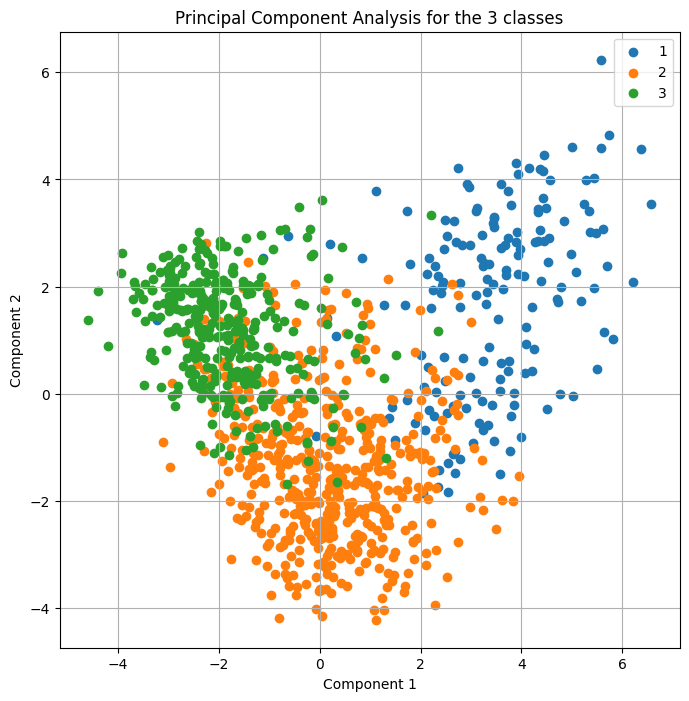

In [14]:
features = data.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA()
pca.fit(df_scaled)
principal_components = pca.transform(df_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)])
pc_df['Class'] = cl
class_labels = pc_df['Class'].unique()

# Create a scatter plot
plt.figure(figsize=(8, 8))
for label in class_labels:
    subset = pc_df[pc_df['Class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis for the 3 classes')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
cl

,label
0,1
1,1
2,1
3,2
4,2
...,...
1027,2
1028,1
1029,2
1030,2


In [16]:
lb = cl.replace({1: 0, 2: 1,3:2})

In [17]:
lb

,label
0,0
1,0
2,0
3,1
4,1
...,...
1027,1
1028,0
1029,1
1030,1


In [18]:
counts = cl['label'].value_counts()
print(counts)

2    517
3    345
1    170
Name: label, dtype: int64


#XGboost Underlying Model

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Split the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, lb, test_size=0.1, random_state=42)


Train and fit the model

In [21]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.65%


In [22]:
#which class is predicted (131,)
print(y_pred)

[0 0 1 1 2 2 2 1 1 1 0 2 0 2 1 2 2 0 1 2 2 2 2 1 1 2 2 1 1 2 2 0 1 1 1 2 1
 0 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 2 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 0 2
 2 2 2 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 0 2 2 0 2 2 2 2 1 2]


Plot the prediction results

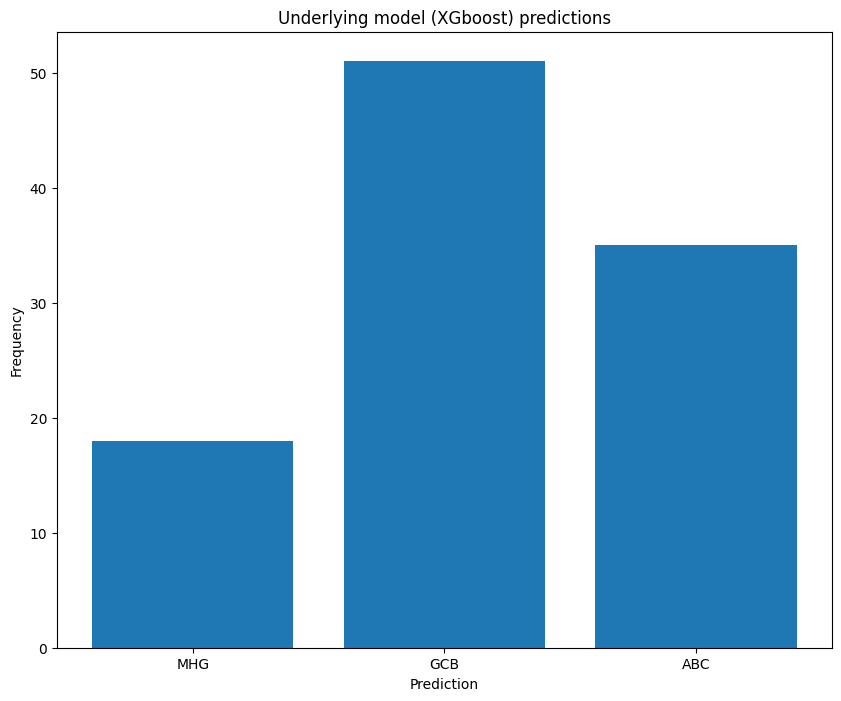

In [23]:
num_MHG = np.sum(y_pred == 0)
num_GCB = np.sum(y_pred == 1)
num_ABC = np.sum(y_pred == 2)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(['MHG', 'GCB','ABC'], [num_MHG, num_GCB,num_ABC])#, color=['darkseagreen', 'darkseagreen'])
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Underlying model (XGboost) predictions')
plt.show()


In [24]:
trueClass=y_test.values.ravel()
print(trueClass)

[0 0 2 1 2 2 2 2 1 1 0 2 0 1 1 2 2 1 1 2 2 1 2 1 1 2 2 0 1 2 2 0 1 1 1 2 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 2 1 1 1 0 1 1 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 0 2
 2 2 2 2 0 1 1 2 1 1 2 1 1 1 1 2 0 1 1 2 0 2 2 0 1 2 2 2 1 2]


In [25]:
errors = sum(1 for x, y in zip(trueClass, y_pred) if x != y)

In [26]:
differences_positions = [index for index, (x, y) in enumerate(zip(trueClass, y_pred)) if x != y]
print("Positions of differences:", differences_positions)

Positions of differences: [2, 7, 13, 17, 21, 27, 38, 39, 42, 50, 54, 56, 77, 81, 89, 93, 98]


In [27]:
X_test_prob = model.predict_proba(X_test)
print(X_test_prob)

[[9.95791316e-01 4.17084526e-03 3.78978293e-05]
 [9.99901772e-01 2.98916184e-05 6.82959217e-05]
 [7.62857555e-04 7.74521410e-01 2.24715754e-01]
 [7.01555237e-03 9.86199021e-01 6.78549102e-03]
 [2.22391347e-04 1.04699396e-02 9.89307702e-01]
 [1.39714059e-04 6.27692149e-04 9.99232650e-01]
 [1.09316061e-05 5.50992881e-05 9.99933958e-01]
 [3.20702879e-04 7.95551360e-01 2.04127908e-01]
 [1.38228916e-05 9.99907136e-01 7.89769765e-05]
 [1.17417776e-05 9.99638200e-01 3.49993556e-04]
 [9.66858566e-01 3.00417580e-02 3.09963245e-03]
 [4.47307175e-05 1.03845890e-03 9.98916864e-01]
 [9.45419192e-01 6.70689717e-03 4.78738993e-02]
 [1.32542060e-04 2.08000630e-01 7.91866839e-01]
 [9.91796423e-06 9.99930501e-01 5.96163918e-05]
 [2.74958642e-04 1.15385195e-02 9.88186538e-01]
 [1.53032724e-05 1.04496328e-04 9.99880195e-01]
 [9.57284451e-01 4.26231436e-02 9.24471096e-05]
 [1.90526096e-03 9.72549498e-01 2.55451761e-02]
 [6.90002635e-04 7.81731680e-03 9.91492689e-01]
 [2.63606175e-03 1.23178847e-01 8.741851

##prediction of XGboost for the UNC

In [28]:
unc_pred = model.predict(unc)
unc_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int32)

In [29]:
unc_prob = model.predict_proba(unc)

# CONFORMAL PREDICTION TO ACHIVE 95% accuracy

##Evaluation functions

In [30]:
def get_accuracy(prediction, real_class):
    correct = 0
    N = len(prediction)
    for i in range(0, N):
        if prediction[i][real_class[i]]:
            correct += 1
    return correct / N

In [31]:
def get_oneC_avgC(prediction):
    arr = np.array(prediction)
    oneC = 0
    avgC = 0
    for i in range(0, len(arr)):
        # number of predicted lables
        num_predicted = arr[i].sum()
        avgC += num_predicted
        # is it a singleton?
        if num_predicted == 1:
            oneC += 1
        pass
    oneC /= len(arr)
    avgC /= len(arr)
    return oneC, avgC

## Let's start the inductive conformal classifier

In [32]:
significance=0.05

Split the dataset into 3 parts: training, test, and calibration

test = 10% ( as before)
the rest 90% to:
train = 80%
calibration = 20%

The training and the test sets will be used in the same way as before: to train the predictive model and to evaluate its efficiency. We will use the calibration part to estimate when a particular label should be included in the final region prediction

In [33]:
X_tr, X_cal, y_tr, y_cal = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('Test size:',X_test.shape)
print('Calibration size:',X_cal.shape)
print('Train size:',X_tr.shape)


Test size: (104, 20)
Calibration size: (186, 20)
Train size: (742, 20)


Fit the XGboost model on training set



In [34]:
model.fit(X_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

Genetate predictions for the calibration set

In [35]:
y_cal = y_cal.values.ravel()
predictions_cal = model.predict_proba(X_cal)
calib_conformal_vals = []
for i in range(0, len(X_cal)):
    cl = y_cal[i]
    calib_conformal_vals.append(predictions_cal[i][cl])

In [36]:
predictions_cal[0:5]

array([[4.78617803e-05, 9.94817793e-01, 5.13430359e-03],
       [1.63427412e-05, 4.38193418e-03, 9.95601773e-01],
       [8.73616040e-01, 1.25934836e-02, 1.13790445e-01],
       [9.96706069e-01, 2.08275579e-03, 1.21117395e-03],
       [3.39447797e-05, 9.99957919e-01, 8.16289139e-06]], dtype=float32)

In [37]:
y_cal[0:5]

array([1, 2, 0, 0, 1])

In [38]:
calib_conformal_vals

[0.9948178,
 0.9956018,
 0.87361604,
 0.99670607,
 0.9999579,
 0.97710186,
 0.11861426,
 0.9166029,
 0.9998827,
 0.9740046,
 0.0045721214,
 0.9998801,
 0.99940884,
 0.9673839,
 0.9997527,
 0.9993425,
 0.7136038,
 0.99989736,
 0.765474,
 0.99973804,
 0.86840194,
 0.98727196,
 0.4704179,
 0.9831602,
 0.999749,
 0.9997969,
 0.72427326,
 0.37652862,
 0.0025480539,
 0.99960405,
 0.99988496,
 0.9999801,
 0.01636297,
 0.6258581,
 0.99344105,
 0.9993643,
 0.9970818,
 0.8978277,
 0.99919516,
 0.9722775,
 0.9853955,
 0.9996915,
 0.99261546,
 0.99970776,
 0.9983877,
 0.19147177,
 0.9989029,
 0.99617803,
 0.9992107,
 0.9581032,
 0.99870706,
 0.99951375,
 0.99996185,
 0.9943546,
 0.9972972,
 0.9990669,
 0.9978941,
 0.9998276,
 0.99991345,
 0.99966955,
 0.9356702,
 0.018742196,
 0.9918997,
 0.00044459107,
 0.08847286,
 0.17427835,
 0.9998229,
 0.99959046,
 0.996633,
 0.9976884,
 0.9786733,
 0.99994683,
 0.9223759,
 0.26272538,
 0.77304935,
 0.9999038,
 0.15202759,
 0.9987173,
 0.99877554,
 0.9998307

SORT and PLOT them

We will analyze how conformal every data point from the calibration set is (conformity function).

Text(0.5, 1.0, 'Distibution of conformity scores')

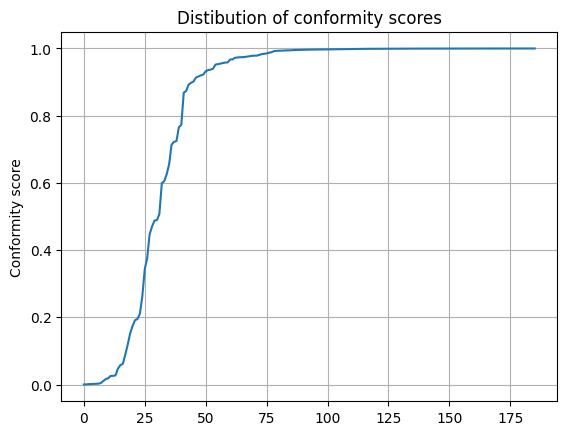

In [39]:
import matplotlib.pyplot as plt
import numpy as np
calib_conformal_vals = np.sort(calib_conformal_vals)
plt.plot(calib_conformal_vals)
plt.grid(True)
plt.ylabel('Conformity score')
plt.title('Distibution of conformity scores')

We will start with generating predictions for the test set:

In [40]:
predictions_test = model.predict_proba(X_test)

#For the first patient

### Should we include class 1?

In [41]:
print('Distribution of probabilities for the first datapoint in the test set:')
predictions_test[0]

Distribution of probabilities for the first datapoint in the test set:


array([9.9447709e-01, 5.4165344e-03, 1.0629896e-04], dtype=float32)

In [42]:
rounded_num = round(1.0629896e-04, 4)
rounded_num

0.0001

Let  analyze the position of probability associated with class 0 in our distribution of conformity values:

Text(0.5, 1.0, 'Distribution of conformity scores')

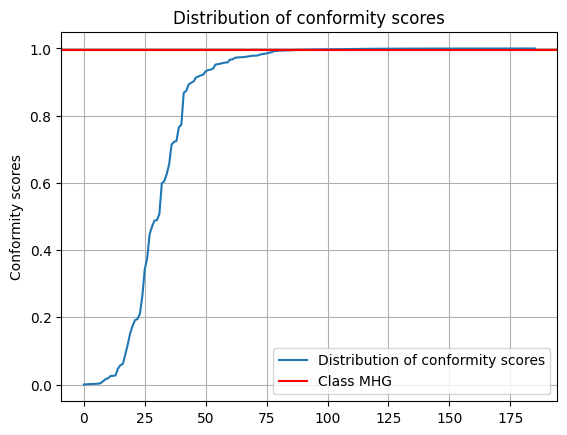

In [43]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][0], color='r', linestyle='-')
plt.legend(['Distribution of conformity scores', 'Class ΜHG'])
plt.grid(True)
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [44]:
val = sum(calib_conformal_vals <= predictions_test[0][0]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 86
Left side:    45.99%


In [45]:
val = (sum(calib_conformal_vals > predictions_test[0][0]) + 1)
print('Right side (>): {}'.format(val))
print('Right hside:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 102
Right hside:   54.55%


 If we do not include the class label 1, then, the probability of making a mistake through this action is $45.99\%$.

It is higher than our allowed error rate $\epsilon = 5\%$. So we have to include this label.

### Should we include class 2?

Do the same for class 2.

In [46]:
print('Probabilities for the first patient in the test set:')
predictions_test[0]

Probabilities for the first patient in the test set:


array([9.9447709e-01, 5.4165344e-03, 1.0629896e-04], dtype=float32)

Text(0.5, 1.0, 'Distribution of conformity scores')

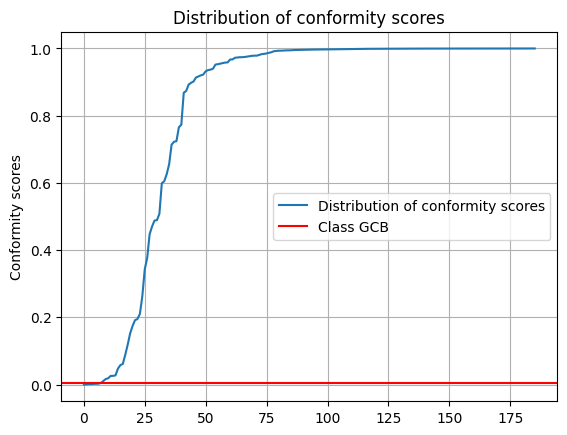

In [47]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][1], color='r', linestyle='-')
plt.grid(True)
plt.legend(['Distribution of conformity scores', 'Class GCB'])
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [48]:
val = sum(calib_conformal_vals <= predictions_test[0][1]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 9
Left side:    4.81%


In [49]:
val = (sum(calib_conformal_vals > predictions_test[0][1]) + 1)
print('Right side (>): {}'.format(val))
print('Right side:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 179
Right side:   95.72%


If the class label 2 is not included in the region prediction, the probability of making a mistake is $4.81\%$. It is less than our allowed error rate $\epsilon = 5\%$. So we will not onclude class label 2.

### Should we include class 3?

Now, for class 3.

In [50]:
print('Probabilities for the first patient in the test set:')
predictions_test[0]

Probabilities for the first patient in the test set:


array([9.9447709e-01, 5.4165344e-03, 1.0629896e-04], dtype=float32)

Text(0.5, 1.0, 'Distribution of conformity scores')

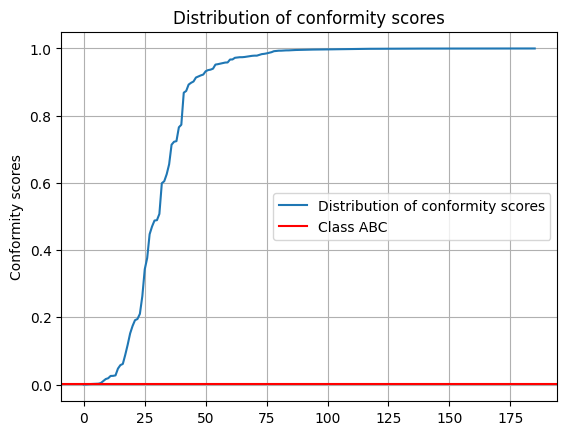

In [51]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][2], color='r', linestyle='-')
plt.grid(True)
plt.legend(['Distribution of conformity scores', 'Class ABC'])
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [52]:
val = sum(calib_conformal_vals <= predictions_test[0][2]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 1
Left side:    0.53%


In [53]:
val = (sum(calib_conformal_vals > predictions_test[0][2]) + 1)
print('Right side (>): {}'.format(val))
print('Right side:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 187
Right side:   100.0%


Using the same reasoning, we should not include class 3

#  GENERALISE FOR THE WHOLE TEST SET

In [54]:
Cp_vals_inverse = np.zeros((len(X_test), 3))
for i in range(0, len(X_test)):
    for j in range(0, 3):
        Cp_vals_inverse[i,j] = (sum(calib_conformal_vals <= predictions_test[i,j]) + 1) / (len(calib_conformal_vals) + 1)

For the whole test set :

In [55]:
final_cp_prediction = Cp_vals_inverse > significance
final_cp_prediction

array([[ True, False, False],
       [ True, False, False],
       [False,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [False,  True, False],
       [False,  True, False],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True,  True, False],
       [False,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True,  True, False],
       [False,  True, False],
       [Fa

Plot the ICP results

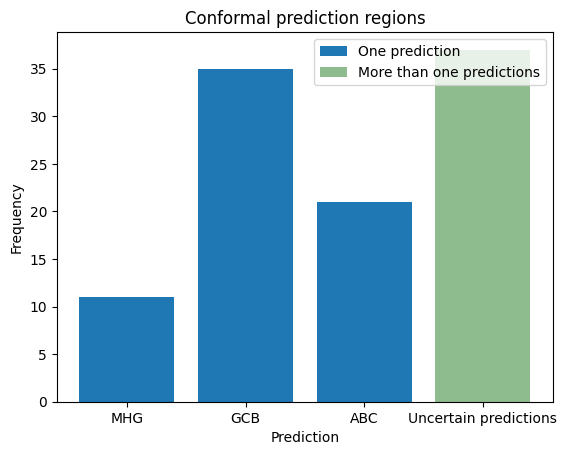

In [56]:
d = pd.DataFrame(final_cp_prediction, columns=['MHG', 'GCB', 'ABC'])
filtered_df = d[d.sum(axis=1) == 1]
result = filtered_df.sum()
unc1 = len(d) - len(filtered_df)

# Plot the results
plt.bar(result.index, result.values, label='One prediction')
plt.bar(['Uncertain predictions'], [unc1], label='More than one predictions', color='darkseagreen')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.title('Conformal prediction regions')
plt.show()


In [57]:
unc1

37

In [58]:
result

MHG    11
GCB    35
ABC    21
dtype: int64

In [59]:
interval_test=pd.DataFrame(final_cp_prediction)
interval_test

,0,1,2
0,True,False,False
1,True,False,False
2,False,True,True
3,False,True,False
4,False,False,True
...,...,...,...
99,False,True,True
100,False,False,True
101,False,True,True
102,False,True,False


Find rows with more than one True

In [60]:
selected_indices = [index for index, row in interval_test.iterrows() if row.sum() > 1]

print("Indices of rows with more than one True:", selected_indices)

Indices of rows with more than one True: [2, 7, 10, 12, 13, 17, 18, 20, 25, 26, 27, 31, 35, 43, 44, 48, 50, 53, 54, 56, 57, 60, 61, 67, 69, 72, 77, 82, 86, 89, 92, 93, 96, 97, 98, 99, 101]


In [61]:
common_count = sum(1 for num in selected_indices if num in differences_positions)
common_count

12

12 of the 17 wrong predictions of the basic algorithm were evaluated as uncertain by the conformal prediction

In [62]:
count_2_true = 0
count_1_true = 0
count_3_true = 0

for row in final_cp_prediction:
    true_count = sum(row)
    if true_count == 2:
        count_2_true += 1
    elif true_count == 1:
        count_1_true += 1
    elif true_count == 3:
        count_3_true += 1

print("Occurrences with 2 True values in rows:", count_2_true)
print("Occurrences with 1 True value in rows:", count_1_true)
print("Occurrences with 3 True values in rows:", count_3_true)

Occurrences with 2 True values in rows: 29
Occurrences with 1 True value in rows: 67
Occurrences with 3 True values in rows: 8


matrix for the demosptation of the intervals

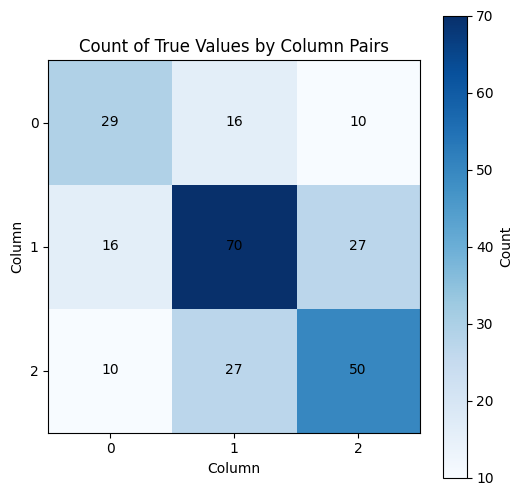

In [63]:
new_df = interval_test.head(4)

def find_true_positions(row):
    return np.where(row)[0]

matrix = np.zeros((3, 3), dtype=int)

for _, row in interval_test.iterrows():
    true_positions = find_true_positions(row)

    for i in true_positions:
        for j in true_positions:
            matrix[i, j] += 1

# Plot the matrix as a heatmap with numbers
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='Blues')

# Display the numbers in the heatmap
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Count of True Values by Column Pairs')
plt.xticks(range(3))
plt.yticks(range(3))
plt.grid(False)
plt.show()



###Evalluation of the result

SET SIZE : A wider spread is generally desirable, since it means that the
procedure is effectively distinguishing between easy and hard inputs.

In [66]:
true_test_set_size=true_counts_test.value_counts()
true_test_set_size

1    67
2    29
3     8
dtype: int64

In [67]:
acc = get_accuracy(final_cp_prediction, y_test.values.ravel())
oneC, avgC = get_oneC_avgC(final_cp_prediction)
print('Accuracy of the region predictor: {}%'.format(acc * 100))
print('Efficiency:\n\t oneC = {}\n\t avgC = {}'.format(oneC, avgC))

Accuracy of the region predictor: 95.1923076923077%
Efficiency:
	 oneC = 0.6442307692307693
	 avgC = 1.4326923076923077


In [68]:
# Calculate empirical coverage
empirical_coverage = final_cp_prediction[
    np.arange(final_cp_prediction.shape[0]), y_test.values.ravel()
].mean()
print(f"The empirical coverage is: {empirical_coverage*100}")

The empirical coverage is: 95.1923076923077


#About the unc test set

Make prediction for the UNC set

In [69]:
predictions_unc = model.predict_proba(unc)

In [70]:
Cp_unc = np.zeros((len(unc), 3))
for i in range(0, len(unc)):
    for j in range(0, 3):
        Cp_unc[i,j] = (sum(calib_conformal_vals <= predictions_unc[i,j]) + 1) / (len(calib_conformal_vals) + 1)

In [71]:
final_cp_unc = Cp_unc > significance
final_cp_unc

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [Fa

Plot the results

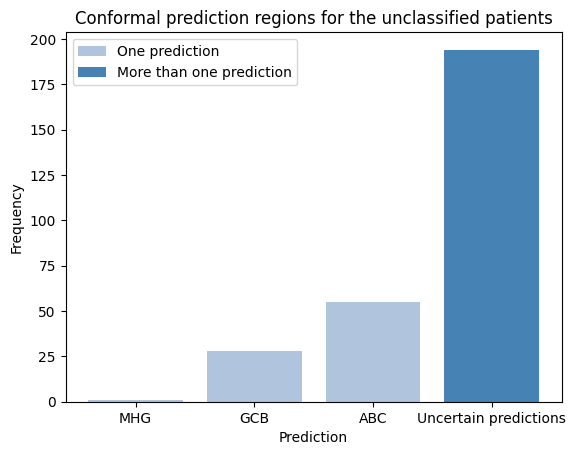

In [72]:
du = pd.DataFrame(final_cp_unc, columns=['MHG', 'GCB', 'ABC'])

filtered = du[du.sum(axis=1) == 1]
resultu = filtered.sum()

unc2 = len(du) - len(filtered)

# Plot the results
plt.bar(resultu.index, resultu.values, label='One prediction',color='lightsteelblue')
plt.bar(['Uncertain predictions'], [unc2], label='More than one prediction', color='steelblue')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.title('Conformal prediction regions for the unclassified patients')
plt.show()


In [73]:
count_2_u = 0
count_1_u = 0
count_3_u = 0

for row in final_cp_unc:
    true_count1 = sum(row)
    if true_count1 == 2:
        count_2_u += 1
    elif true_count1 == 1:
        count_1_u += 1
    elif true_count1 == 3:
        count_3_u += 1

print("Occurrences with 2 True values in rows:", count_2_u)
print("Occurrences with 1 True value in rows:", count_1_u)
print("Occurrences with 3 True values in rows:", count_3_u)

Occurrences with 2 True values in rows: 145
Occurrences with 1 True value in rows: 84
Occurrences with 3 True values in rows: 49


In [74]:
interval=pd.DataFrame(final_cp_unc)
interval

,0,1,2
0,False,True,False
1,True,True,True
2,False,True,True
3,False,True,True
4,True,True,True
...,...,...,...
273,True,True,True
274,False,False,True
275,True,True,True
276,False,False,True


check how the conformal works on the unc set

In [76]:
oneCunc, avgCunc = get_oneC_avgC(interval)
print( oneCunc, avgCunc)

0.302158273381295 1.8741007194244603
